# What sells a car?

This project aims to determine which factors influence the price of the vehicle the most. The analysis of the project will help the client who posted their advertisements for their vehicle be on the right track when pricing their vehicle for sale. 


## Initialization

In [2]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data file into a DataFrame
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

In [4]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# Size of the dataframe
df.shape

(51525, 13)

### Explore initial data

The dataset contains the following fields:
- `price` — price listed on ads.
- `model_year` — vehicle model year.
- `model` — vehicle model.
- `condition` — conditions of the vehicle.
- `cylinders` — number of cylinders.
- `fuel` — fuel type.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission` — transmission.
- `paint_color` — color of the vehicle.
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type).
- `date_posted` — the date the ad was published.
- `days_listed` — from publication to removal.


In [6]:
# Statistic of the dataframe
df.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [7]:
# print a sample of data
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10804,6000,2006.0,ford expedition,good,NaN,gas,207400.0,automatic,SUV,brown,1.0,2019-03-01,75
11780,21900,2016.0,nissan frontier crew cab sv,good,6.0,gas,4998.0,other,pickup,white,NaN,2019-04-10,9
5579,11500,NaN,jeep wrangler,excellent,6.0,gas,176000.0,automatic,SUV,black,1.0,2018-05-11,20
29634,24999,2017.0,ram 1500,like new,8.0,gas,64000.0,automatic,pickup,blue,1.0,2019-03-14,31
14023,12500,2011.0,toyota tundra,good,8.0,gas,157500.0,automatic,pickup,grey,1.0,2018-09-05,57


In [8]:
# missing values of the dataframe
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
# percentage missing values of the dataframe
df[['model_year','cylinders','odometer','paint_color','is_4wd']].isna().sum()/len(df)

model_year     0.070238
cylinders      0.102086
odometer       0.153168
paint_color    0.179854
is_4wd         0.503697
dtype: float64

In [10]:
# initial data correlation 
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


#### Initial Data summary conclusion
- total 5 columns missing data.
- with is_4wd column missing the most data which is up to 50%.
- date_posted should be in datetime datatype.

## Data preprocessing

### date_posted

In [11]:
# Change date_posted to datetime formate
df['date_posted']= pd.to_datetime(df['date_posted'])

### model_year

In [12]:
# Create years_posted from date_posted column
df['years_posted']=df['date_posted'].dt.year

In [13]:
# Fill missing model_year with median of years different from year_posted and model_year.
df['model_year'].fillna(df['years_posted']-((df['years_posted']-df['model_year']).median()),inplace=True)
df['model_year'].isna().sum()

0

In [14]:
# Change model_year dtype to int64
df['model_year']=df['model_year'].astype('int64')

In [15]:
# Drop temporary created column
df = df.drop(['years_posted'], axis=1)

### is_4wd

In [16]:
# Fill missing values in is_4wd assuming they are all 0 (false)
df['is_4wd'].fillna(0,inplace=True)

In [17]:
# Change is_4wd dtype to int64
df['is_4wd']=df['is_4wd'].astype('int64')

### cylinder

In [18]:
# Fill missing values of cylinder groupby type and model median
df['cylinders'] = df.groupby(['type','model'])['cylinders'].apply(lambda x: x.fillna(x.median()))
df['cylinders'].isna().sum()

15

In [19]:
# Missing values still exist
df[df['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
6892,21000,2015,jeep grand cherokee,like new,NaN,gas,75000.0,automatic,hatchback,grey,0,2018-10-05,12
12901,6999,2011,jeep liberty,excellent,NaN,gas,111500.0,automatic,van,silver,1,2018-08-06,21
14354,3000,2005,toyota sienna,fair,NaN,gas,NaN,automatic,pickup,NaN,0,2019-04-01,47
15985,1800,2000,toyota corolla,fair,NaN,gas,120768.0,automatic,truck,grey,0,2019-03-28,89
16604,7800,2001,ford f350 super duty,good,NaN,diesel,277512.0,automatic,sedan,red,1,2019-02-21,54


In [20]:
# Drop left over missing values
df.dropna(subset=['cylinders'], inplace=True)

In [21]:
# Change cylinders dtype to int64
df['cylinders']=df['cylinders'].astype('int64')

### odometer

In [22]:
# Print 0 millage vehicle
df[df['odometer']==0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009,gmc yukon,excellent,8,gas,0.0,automatic,SUV,white,1,2019-03-16,88
814,2995,1999,ford f-150,good,6,gas,0.0,manual,truck,NaN,0,2019-03-14,16
1375,5888,2012,toyota 4runner,good,6,gas,0.0,automatic,SUV,black,0,2019-02-22,36
1461,1000,1992,gmc sierra 1500,good,8,gas,0.0,automatic,truck,NaN,0,2018-09-28,47
1970,10988,2000,ford f-250 sd,good,8,diesel,0.0,automatic,truck,white,1,2018-11-21,39


In [23]:
# Print missing values odometer
df[df['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9
15,17990,2013,ram 1500,excellent,8,gas,NaN,automatic,pickup,red,1,2018-05-15,111
23,7500,2004,jeep wrangler,good,6,gas,NaN,automatic,SUV,red,1,2018-05-17,39
24,3950,2009,chrysler 200,excellent,4,gas,NaN,automatic,sedan,red,0,2018-06-11,40
25,11499,2017,chevrolet malibu,like new,4,gas,NaN,automatic,sedan,NaN,0,2018-07-26,43


In [24]:
# Calculate total missing values of odometer
df['odometer'].isna().sum()

7890

In [25]:
# Replace 0 odometer vales with NaN
df['odometer'].replace(0,np.nan,inplace=True)

In [26]:
# Fill odometer missing values group by model_year
df['odometer'] = df.groupby(['model_year'])['odometer'].apply(lambda x: x.fillna(x.median()))
df['odometer'].isna().sum()

1

In [27]:
# Drop the 1 left over missing value
df.dropna(subset=['odometer'], inplace=True)

In [28]:
# Convert Odometer dtype to int64
df['odometer']=df['odometer'].astype('int64')

### paint_color

In [29]:
# List paint_color values
df['paint_color'].value_counts()

white     10029
black      7690
silver     6240
grey       5035
blue       4472
red        4419
green      1394
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [30]:
# Fill missing values with most common color
df['paint_color'].fillna('Others',inplace=True)
# Recheck missing value
df['paint_color'].isna().sum()

0

### price

In [31]:
# Print lenght of price listed lower than 100
len(df[df['price'] < 100])

863

In [32]:
# Sample of price lower than 100
df.query('price<100').sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19445,1,2003,chevrolet malibu,good,6,gas,190000,automatic,sedan,Others,0,2018-11-20,51
17011,1,2018,ford f-150,excellent,6,gas,17269,automatic,truck,silver,0,2018-06-27,48
14822,1,2016,toyota tundra,excellent,8,gas,23042,automatic,truck,black,1,2019-03-04,104
11738,1,2015,ford edge,excellent,6,gas,78920,automatic,SUV,black,1,2018-07-12,24
49420,1,2014,chevrolet silverado,like new,8,gas,42,automatic,truck,black,1,2018-12-28,16


In [33]:
# Replace price <100 with NaN
for row in df['price']:
    if row < 100:
        df['price'].replace(row,np.nan,inplace=True)

In [34]:
# Filled those NaN groupby model and type median
df['price'] = df.groupby(['model','type'])['price'].apply(lambda x: x.fillna(x.median()))
df['price'].isna().sum()

1

In [35]:
# Drop the 1 left over Null value
df.dropna(subset=['price'], inplace=True)

In [36]:
# Reset Index
df.reset_index(drop=True, inplace=True)

In [37]:
# Recheck for dataframe null values
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [38]:
# Check for dataframe duplicates
df.duplicated().sum()

0

In [39]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51508 entries, 0 to 51507
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51508 non-null  float64       
 1   model_year    51508 non-null  int64         
 2   model         51508 non-null  object        
 3   condition     51508 non-null  object        
 4   cylinders     51508 non-null  int64         
 5   fuel          51508 non-null  object        
 6   odometer      51508 non-null  int64         
 7   transmission  51508 non-null  object        
 8   type          51508 non-null  object        
 9   paint_color   51508 non-null  object        
 10  is_4wd        51508 non-null  int64         
 11  date_posted   51508 non-null  datetime64[ns]
 12  days_listed   51508 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


**Data preprocessing summarized conclusion**

- Missing values of the model ear are filled with median of years different from year posted and model year.
- Missing values of the cylinder are filled group by type and model median.
- Left over values of cylinder are dropped because there's only 15 of them.
- Odometer 0 are probably error. Even brand new car have some mileage on it due to transporation from manufacturer to car dealer. Both 0 and missing values are filled group by model year median.
- Missing values in paint color are filled with most common color which is white.
- Price lower than 100 are being replaced with groupby model and type median because car with price lower than 100 are probably error during data entry.
- Dataframe has no duplicates at all.
- Model year,is_4wd,odometer, and cylinders datatype changed to Int64.


### Enrich data

In [40]:
# Create month_posted column from date_posted's months
df['month_posted'] = df['date_posted'].dt.month
# Create days_posted column from date_posted's days
df['days_posted'] = df['date_posted'].dt.dayofweek

In [41]:
# Add the vehicle's age when the ad was placed
df['car_age'] = ((df['date_posted'] - pd.to_datetime(df.model_year, format='%Y'))/ np.timedelta64(1, 'Y'))+1
# Print car_age statistic
df['car_age'].describe()

count    51508.000000
mean         9.950865
std          6.065106
min          1.000000
25%          5.774910
50%          8.726374
75%         13.126190
max        111.512878
Name: car_age, dtype: float64

In [42]:
# Add the vehicle's average mileage per year
df['avg_mil']=(df['odometer']/df['car_age'])
# Print average mile statistic
df['avg_mil'].describe().round()

count     51508.0
mean      13220.0
std        6912.0
min           0.0
25%        9343.0
50%       12544.0
75%       15846.0
max      219413.0
Name: avg_mil, dtype: float64

In [43]:
# List condition values
df['condition'].value_counts()

excellent    24766
good         20141
like new      4739
fair          1604
new            143
salvage        115
Name: condition, dtype: int64

In [44]:
# Assign condition id to each conditions
def df_condition_id(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    if condition == 'salvage':
        return 0

df['condition_id']=df['condition'].apply(df_condition_id).astype('int64')

In [45]:
# Check condition_id
df['condition_id'].value_counts()

3    24766
2    20141
4     4739
1     1604
5      143
0      115
Name: condition_id, dtype: int64

## Exploratory Data Analysis (EDA)
Listed are the main parameters that will be used to study the price factorization.
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [46]:
# print a sample of data
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,days_posted,car_age,avg_mil,condition_id
37853,19995.0,2013,ford f-150,excellent,6,gas,111600,automatic,truck,red,1,2018-12-19,48,12,2,6.963161,16027.202675,3
31979,6600.0,2014,hyundai elantra,good,4,gas,100522,automatic,sedan,silver,0,2018-07-20,34,7,4,5.547664,18119.700177,2
838,10526.0,2011,gmc sierra 1500,excellent,8,gas,178085,automatic,pickup,black,1,2018-08-19,25,8,6,8.630547,20634.266118,3
45284,25500.0,2014,chevrolet silverado 1500,excellent,8,gas,90113,automatic,truck,Others,1,2019-02-25,8,2,0,6.150003,14652.512987,3
17144,3500.0,2008,honda civic lx,good,4,gas,174000,automatic,sedan,black,0,2018-07-15,13,7,6,11.535466,15083.915773,2


In [47]:
# Price statistic
df['price'].describe()

count     51508.000000
mean      12336.749592
std        9939.878545
min         105.000000
25%        5450.000000
50%        9500.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

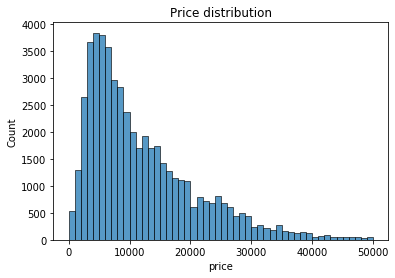

In [48]:
# Price distribution histogram
sns.histplot(data=df, x="price",bins=50,binrange=(0,50000)).set(title="Price distribution");

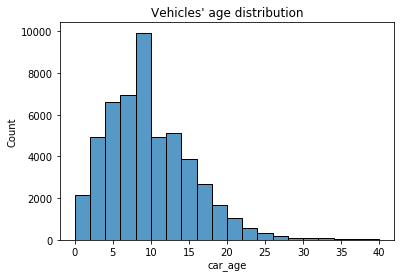

In [49]:
# Vehicles' age distribution histogram
sns.histplot(data=df, x="car_age",bins=20,binrange=(0,40)).set(title="Vehicles' age distribution");

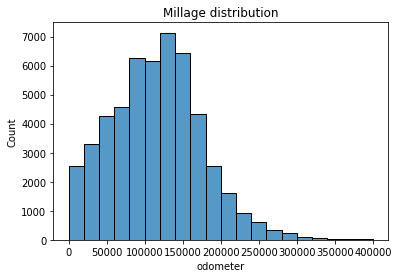

In [50]:
# Odometer distribution histogram
sns.histplot(data=df, x="odometer",bins=20,binrange=(0,400000)).set(title="Millage distribution");

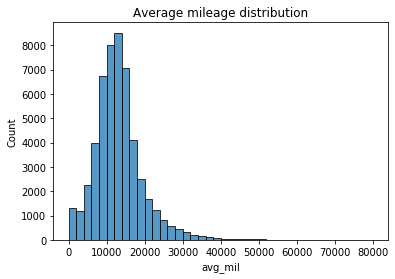

In [51]:
# Average mileage distribution histogram
sns.histplot(data=df, x="avg_mil",bins=40,binrange=(0,80000)).set(title="Average mileage distribution");

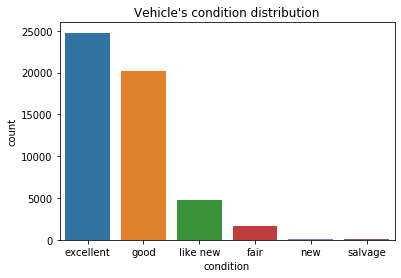

In [52]:
# Condition distribution bar plot
sns.countplot(x ='condition', data = df
              ,order = df['condition'].value_counts().index).set(title="Vehicle's condition distribution");

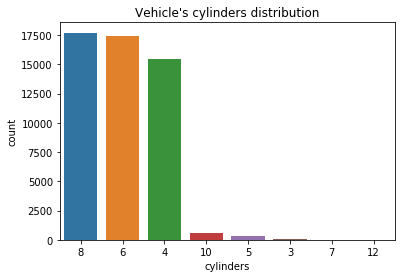

In [53]:
# Cylinders distribution bar plot
sns.countplot(x ='cylinders', data = df
              ,order = df['cylinders'].value_counts().index).set(title="Vehicle's cylinders distribution");

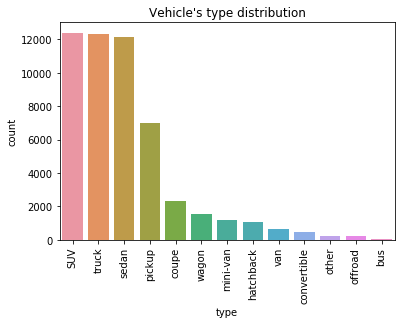

In [54]:
# Vehicle type distribution bar plot
sns.countplot(x ='type', data = df
              ,order = df['type'].value_counts().index).set(title="Vehicle's type distribution")
plt.xticks(rotation=90);

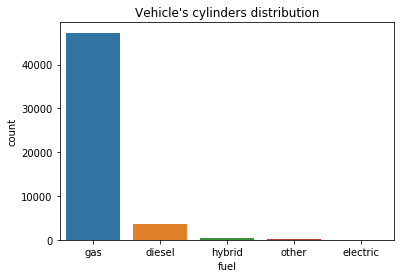

In [55]:
# Vehicle Fuel type distribution bar plot
sns.countplot(x ='fuel', data = df
              ,order = df['fuel'].value_counts().index).set(title="Vehicle's cylinders distribution");

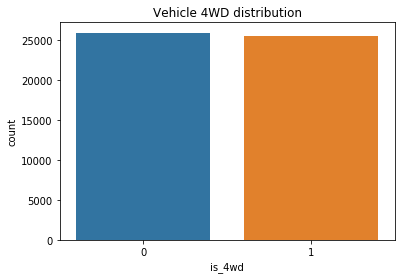

In [56]:
# Vehicle 4WD distribution bar plot
sns.countplot(x ='is_4wd', data = df
              ,order = df['is_4wd'].value_counts().index).set(title="Vehicle 4WD distribution");

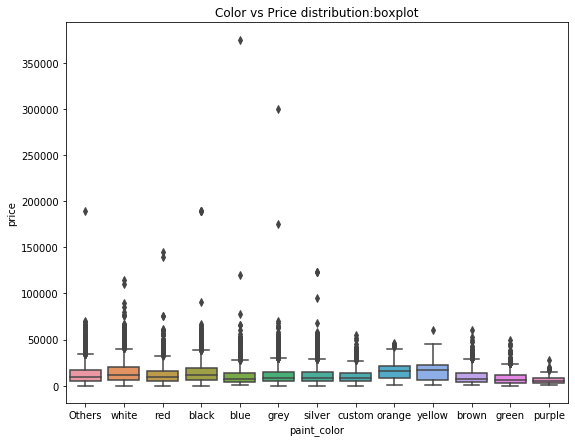

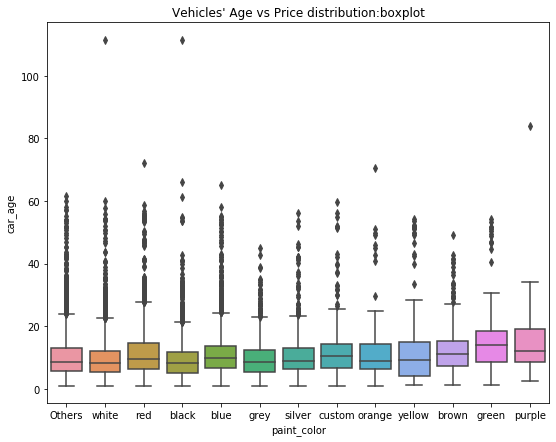

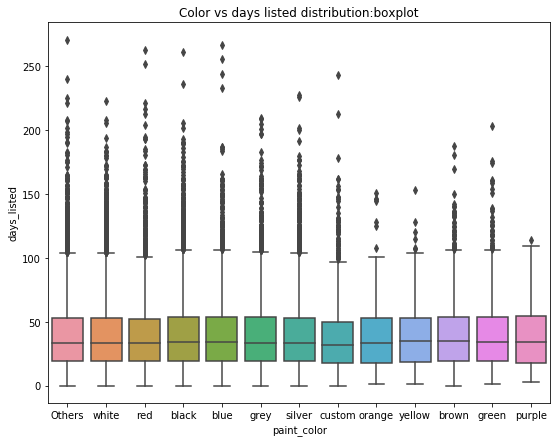

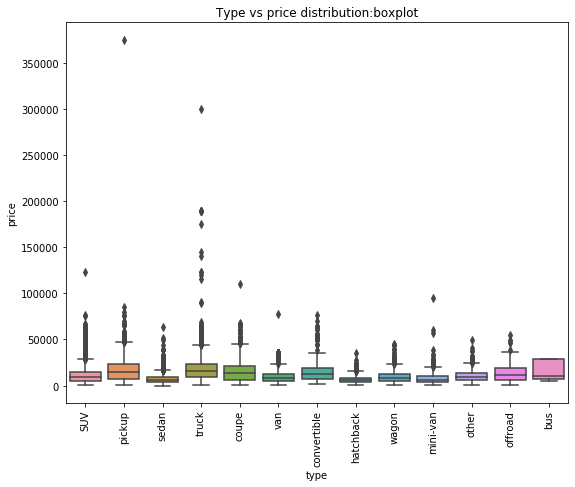

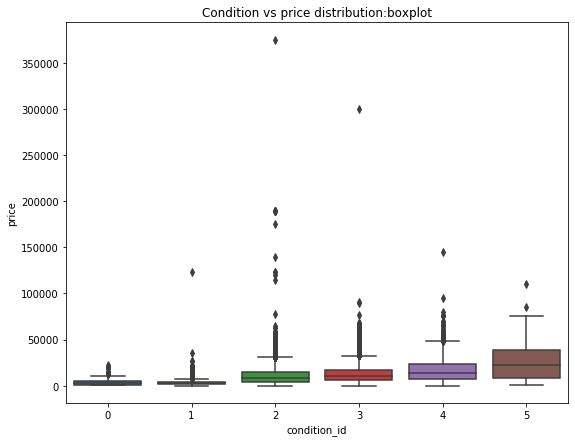

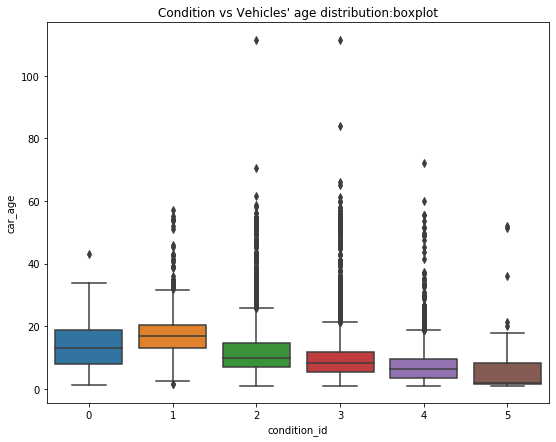

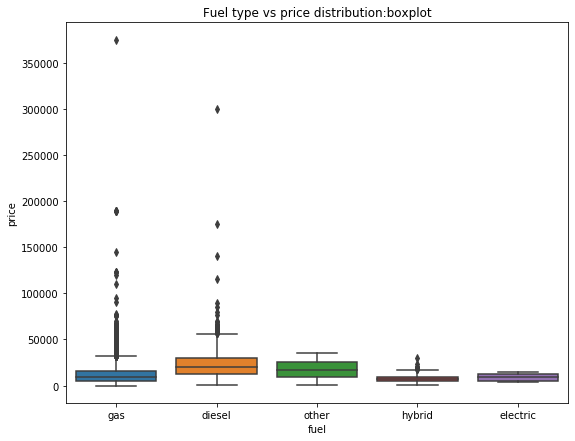

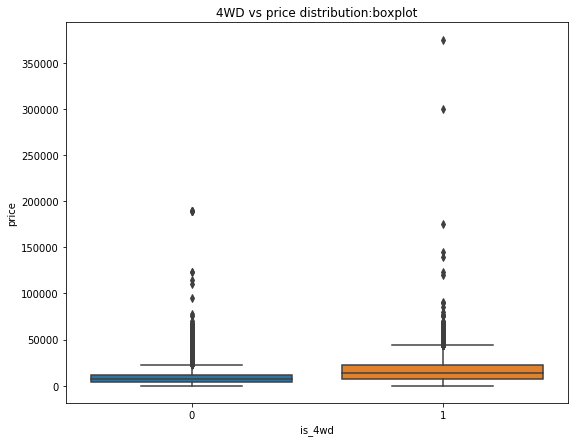

In [57]:
# Various boxplot distribution on price, vehicle's age, and Days listed.
plt.figure(figsize=(9,7))
sns.boxplot(x='paint_color', y='price',data=df).set(title="Color vs Price distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='paint_color', y='car_age',data=df).set(title="Vehicles' Age vs Price distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='paint_color', y='days_listed',data=df).set(title="Color vs days listed distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='type', y='price',data=df).set(title="Type vs price distribution:boxplot");
plt.xticks(rotation=90);
plt.figure(figsize=(9,7))
sns.boxplot(x='condition_id', y='price',data=df).set(title="Condition vs price distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='condition_id', y='car_age',data=df).set(title="Condition vs Vehicles' age distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='fuel', y='price',data=df).set(title="Fuel type vs price distribution:boxplot")
plt.figure(figsize=(9,7))
sns.boxplot(x='is_4wd', y='price',data=df).set(title="4WD vs price distribution:boxplot");

### EDA summarized conclusion
- Boxplot showed great amount of outliers. 
- Outliers need to be get rid to get normal and better distribution.
- Most vehicle price above 5000 to 12000.
- Most vehicle listed is 7 years old.
- Mileage distribution peaked between 100k and 150k miles
- Average mileage around 10k to 15k.
- Most cars listed are in excellent and good shape.
- Most cars listed have 4 to 8 cylinders.
- Most popular car types are SUV,Truck, and Sedan.
- Majority of the vehicle fuel's type are gas.
- The 4WD distribution are pretty much even across the DataFrame.


### Filtered dataframe without outliers

In [58]:
# Create column list with int64 and float64 datatype
intlist = []
for col in df.columns:
    if df[col].dtype == np.int64 and np.float64:
        intlist.append(col)

In [59]:
# Getting rid of upper outliers.
filter = np.zeros(len(df), dtype=bool) + True
for outliers in ['car_age','odometer','days_listed','price','avg_mil']:
    Q1 = df[outliers].quantile(0.25)
    Q3 = df[outliers].quantile(0.75)
    IQR = Q3-Q1
    upper_outliers = Q3+1.5*IQR 
    filter[np.where(df[outliers]>upper_outliers)]=False

In [60]:
# df2 as filtered dataframe without upper outliers
df2 = df[filter]
df2.reset_index(drop=True, inplace=True);

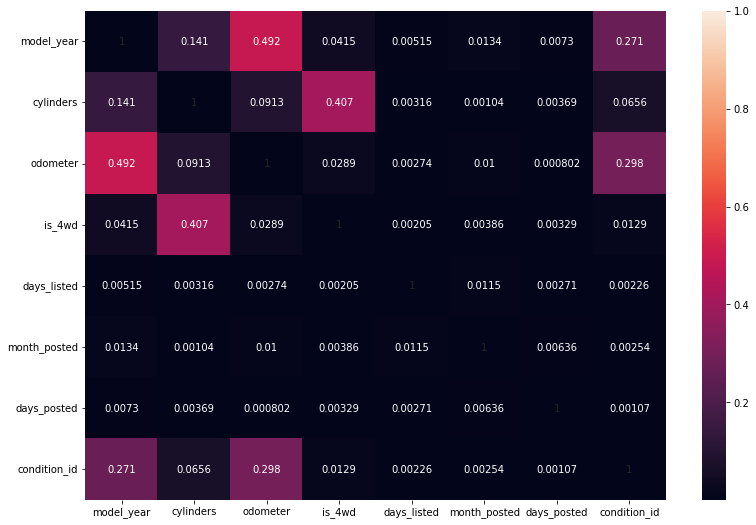

In [61]:
# Correlation Matrix of dataframe
corr_matrix = df[intlist].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(corr_matrix,annot=True,fmt='.3g')

# Mask unimportant features
sns.heatmap(corr_matrix, mask=corr_matrix < 1, cbar=False)
plt.show()

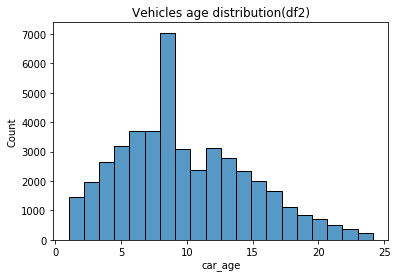

In [62]:
sns.histplot(data=df2,x='car_age',bins=20).set(title='Vehicles age distribution(df2)');

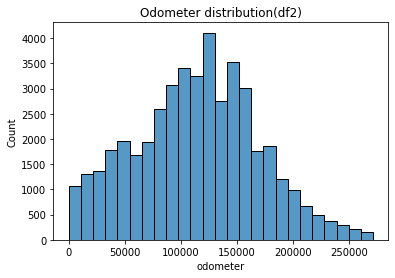

In [63]:
sns.histplot(data=df2,x='odometer',bins=25).set(title='Odometer distribution(df2)');

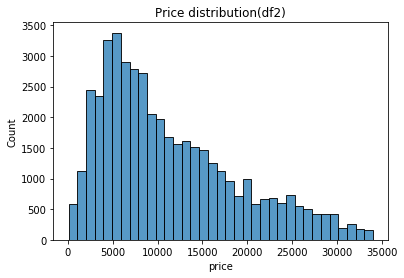

In [64]:
sns.histplot(data=df2,x='price',bins=35).set(title='Price distribution(df2)');

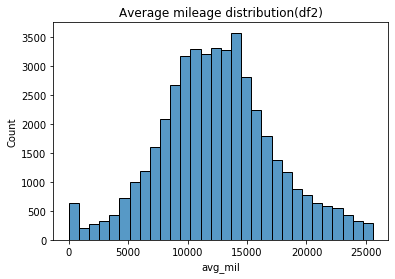

In [65]:
sns.histplot(data=df2,x='avg_mil',bins=30).set(title='Average mileage distribution(df2)');

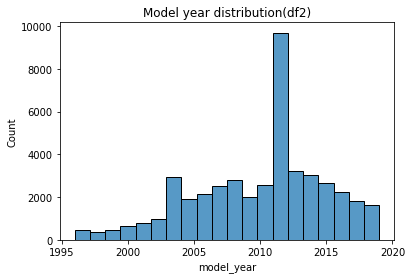

In [66]:
sns.histplot(data=df2,x='model_year',bins=20).set(title='Model year distribution(df2)');

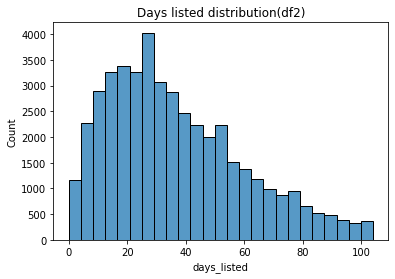

In [67]:
sns.histplot(data=df2,x='days_listed',bins=25).set(title='Days listed distribution(df2)');

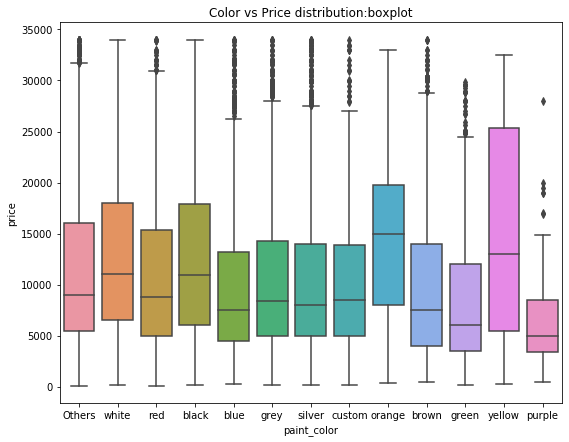

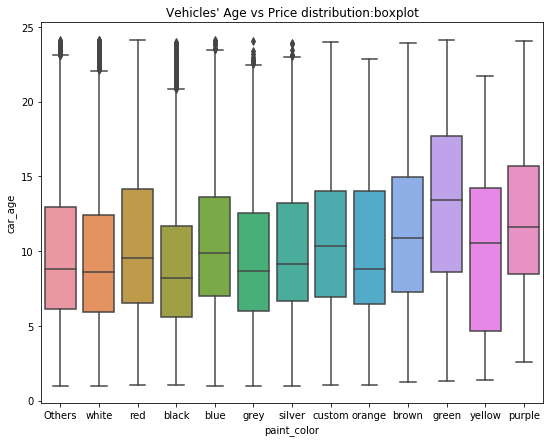

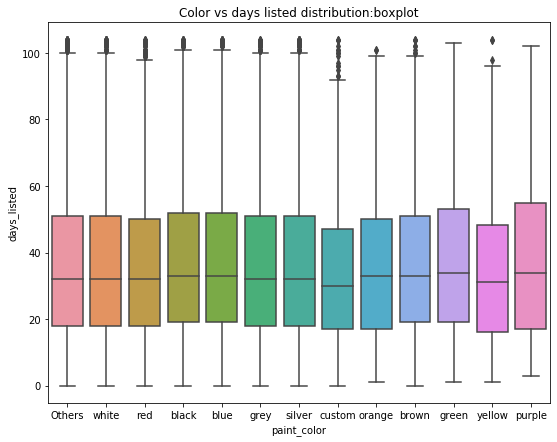

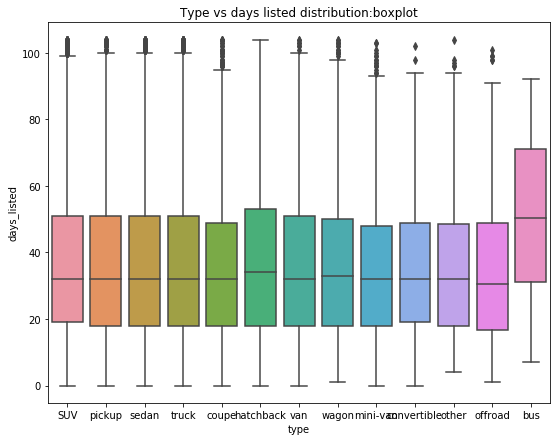

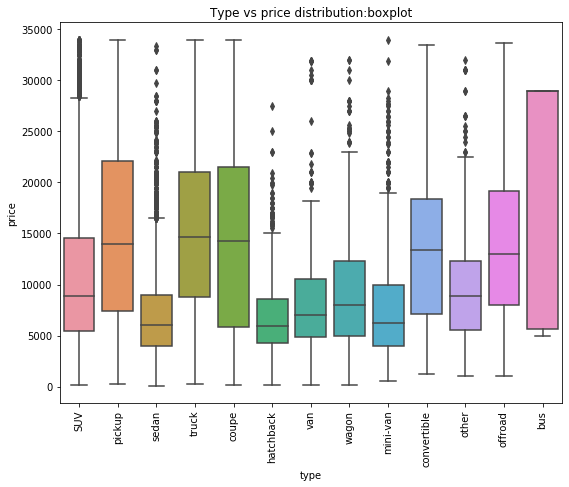

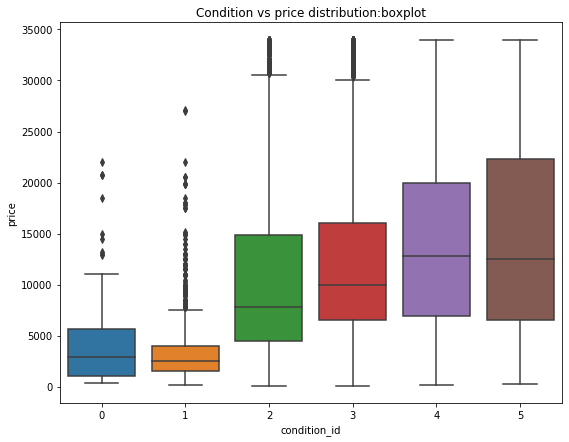

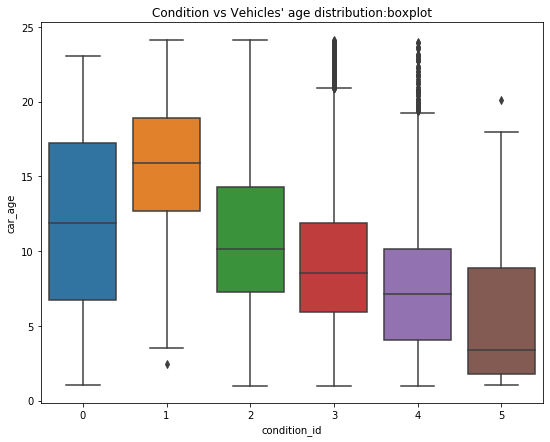

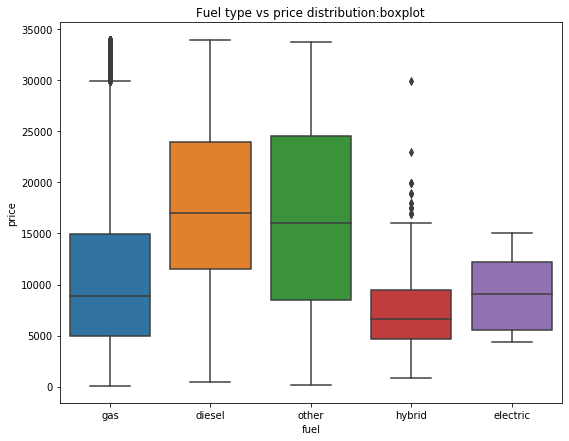

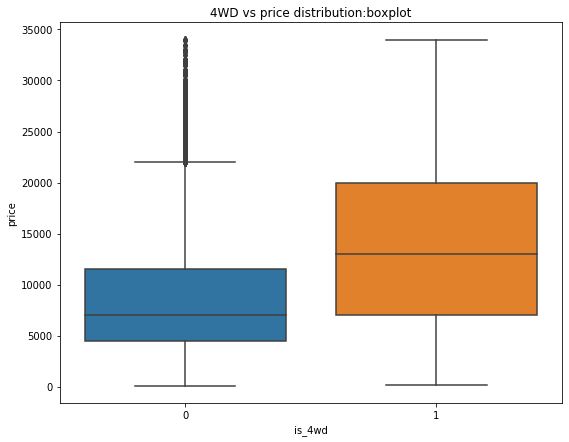

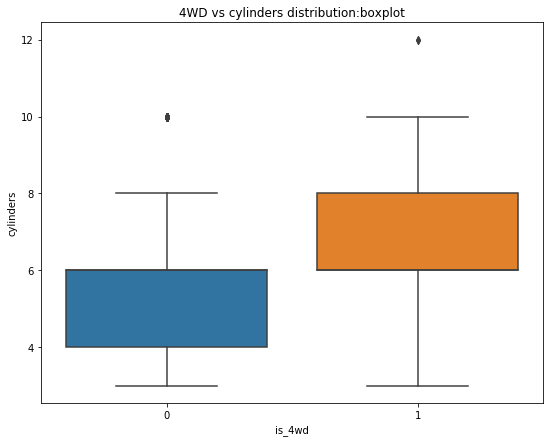

In [68]:
# New filtered outliers dataframe (df2) Various boxplot distribution on price, vehicle's age, and Days listed.
plt.figure(figsize=(9,7))
sns.boxplot(x='paint_color', y='price',data=df2).set(title="Color vs Price distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='paint_color', y='car_age',data=df2).set(title="Vehicles' Age vs Price distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='paint_color', y='days_listed',data=df2).set(title="Color vs days listed distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='type', y='days_listed',data=df2).set(title="Type vs days listed distribution:boxplot");
plt.figure(figsize=(9,7))
plt.xticks(rotation=90);
sns.boxplot(x='type', y='price',data=df2).set(title="Type vs price distribution:boxplot");
plt.xticks(rotation=90);
plt.figure(figsize=(9,7))
sns.boxplot(x='condition_id', y='price',data=df2).set(title="Condition vs price distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='condition_id', y='car_age',data=df2).set(title="Condition vs Vehicles' age distribution:boxplot");
plt.figure(figsize=(9,7))
sns.boxplot(x='fuel', y='price',data=df2).set(title="Fuel type vs price distribution:boxplot")
plt.figure(figsize=(9,7))
sns.boxplot(x='is_4wd', y='price',data=df2).set(title="4WD vs price distribution:boxplot")
plt.figure(figsize=(9,7))
sns.boxplot(x='is_4wd', y='cylinders',data=df2).set(title="4WD vs cylinders distribution:boxplot");

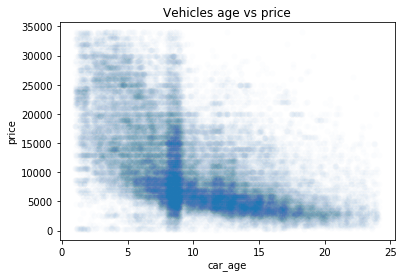

In [69]:
# Vehicles age vs price scatterplot
sns.scatterplot(data=df2,x='car_age', y='price', alpha=.01).set(title='Vehicles age vs price');

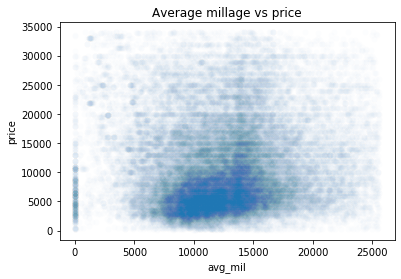

In [70]:
# Average millage vs price scatterplot
sns.scatterplot(data=df2,x='avg_mil', y='price', alpha=.01).set(title='Average millage vs price');

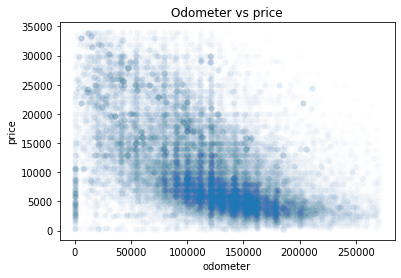

In [71]:
# Odometer vs price scatterplot
sns.scatterplot(data=df2,x='odometer', y='price', alpha=.01).set(title='Odometer vs price');

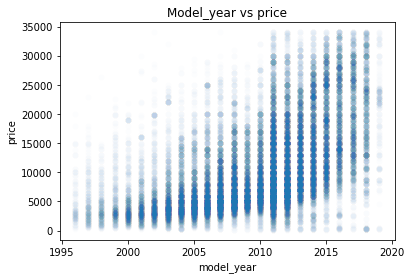

In [72]:
# Model_year vs price scatterplot
sns.scatterplot(data=df2,x='model_year', y='price', alpha=.01).set(title='Model_year vs price');

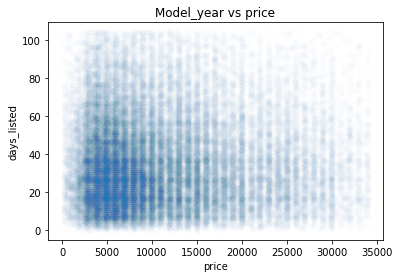

In [73]:
# Days_listed vs price scatterplot
sns.scatterplot(data=df2,x='price', y='days_listed', alpha=.01).set(title='Model_year vs price');

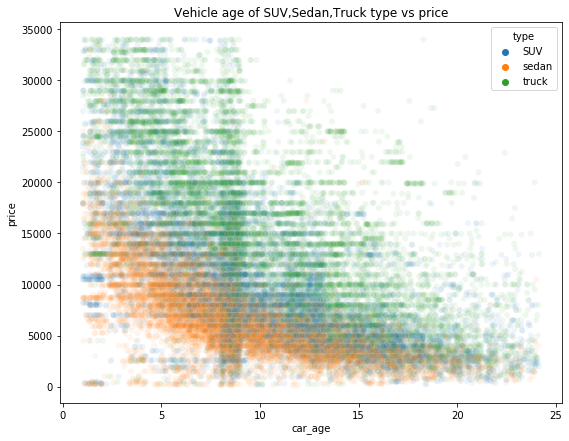

In [74]:
# SUV, Sedan, and Truck: Vehicle type vs price scatterplot
plt.figure(figsize=(9, 7))
sns.scatterplot(data=df2[df2['type'].isin(['SUV', 'sedan','truck'])],
                x='car_age', y='price', alpha=.075,hue='type').set(title='Vehicle age of SUV,Sedan,Truck type vs price');

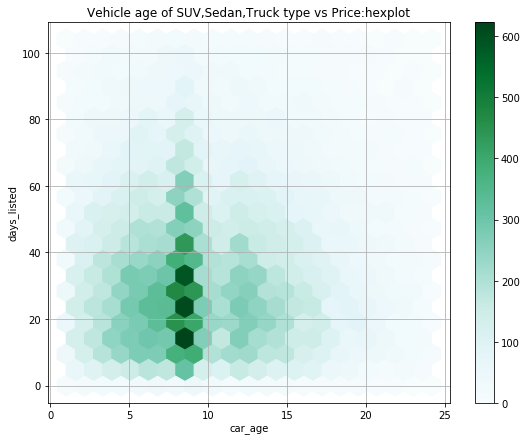

In [75]:
# SUV, Sedan, and Truck (type):Vehicle's age vs price hexplot
df2.plot(x='car_age', y='days_listed', kind='hexbin', gridsize=20, figsize=(9, 7), sharex=False, grid=True)
plt.title('Vehicle age of SUV,Sedan,Truck type vs Price:hexplot');

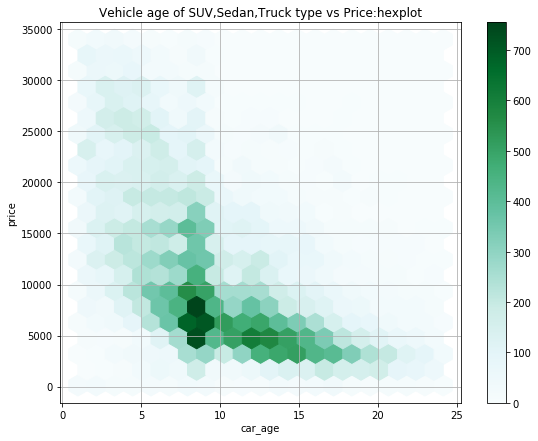

In [76]:
# SUV, Sedan, and Truck (type):Vehicle's age vs price hexplot
df2.plot(x='car_age', y='price', kind='hexbin', gridsize=20, figsize=(9, 7), sharex=False, grid=True)
plt.title('Vehicle age of SUV,Sedan,Truck type vs Price:hexplot');

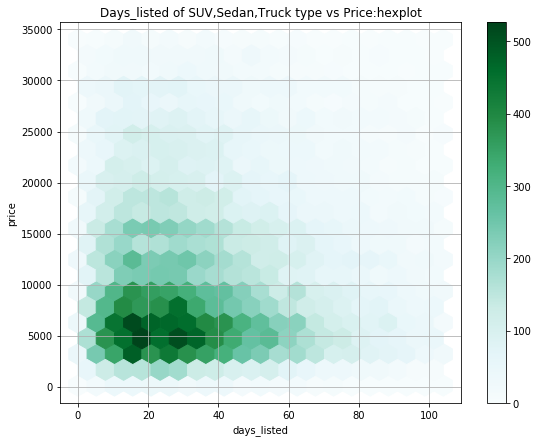

In [77]:
# SUV, Sedan, and Truck (type):Vehicle's age vs price hexplot
df2.plot(x='days_listed', y='price', kind='hexbin', gridsize=20, figsize=(9, 7), sharex=False, grid=True)
plt.title('Days_listed of SUV,Sedan,Truck type vs Price:hexplot');

In [78]:
# Median and mean value of Days_listed on vechicle type pivot table.
df2.pivot_table(index='type', values='days_listed', aggfunc=('mean', 'median')).round(2)

,mean,median
type,,
SUV,36.79,32.0
bus,48.44,50.5
convertible,36.05,32.0
coupe,36.04,32.0
hatchback,37.82,34.0
mini-van,35.64,32.0
offroad,35.35,30.5
other,36.14,32.0
pickup,36.58,32.0


**Summarized New Dataframe without Outliers**

- Correlation matrix showed `model year` and `odometer` has the highest value correlation. Which make sense because the higher value `odometer` tend to produce from older vehicle. 4WD and cylinders has pretty high correlation as well, data showed 4WD car has at least more than 6 cylinders.
- Majority of the vehicle age is approximately 7 years. Green and purple `color` vehicle higher age distribution than majority of the `color`s. Majority of the lower average vehicle age are in better `condition`. Surprisingly vehicle age of fair `condition` vehicle are higher than vehicle with salvage `condition`.
- Vehicle `color` orange and yellow showed higher median price compare to the rest of the color.
- `odometer` distribution looks normal after getting rid of the outliers, peaking at 125k miles. Based on `odometer` vs `price` scatter plot, 75k to 175k miles vehicle are listed around 2500 to 10000 `price` range.
- Peak distribution of the `price` of the vehicle listed are in range of 5000 to 7500.
- Majority of the `model year` posted are in year 2011 to 2012. `price` range on later `model year` car tend to be wider and higher compare to car `model year` before 2011.
- Based on days_listed distribution histogram, most of the ads are listed for 30 to 33 days. Distribution seems normal across all the `color`s of the vehicle on day listed. `color` probably doesn't have any impact on days listed. However, type of the bus has longer day listed on ad vs every other types of the vehicle, median days listed are approximately 50days based on 'type vs days listed distribution' boxplot. Most of the data listed between 0 to 40 days, in the `price` range of 2500 to 10000.
- Pickup, Truck, convertible, coupe and offroad type vehicle showed higher `price` range, approximately 15000. The rest of the `vehicle type` has median `price` lower than 10000.
- SUV, Sedan, and Truck showed as the most common vehicle listed on the ads. Scatter plot showed that sedan has lowest `price` range among the three types, and truck has the highest `price` range among three `vehicle type`s.
- Majority SUV, Sedan, and Truck listed are 7 years old , and typical listed days ranged between 25 to 38 days with `price` range of 4500 to 9000.
- `condition` vs `price` distribution boxplot showed new, likely new, excellent has higher `price` range.
- Diesel and 'other' `fuel` type showed higher `price` range with median approximately at 17000 compare to gas, hybrid, and electric `fuel` type vehicle which is the median below 10000.


### Price factors
Newer or later `model year` vehicle have higher price range. `type` of vehicle are the price factor as well. Vehicle `color` orange and yellow seems to be the price factor as well, purple color seems to lower the price tag. Vehicle `type` pickup, truck, coupe, offroad, and convertible are the listed at higher price range. Besides that, new, likely new, excellent `condition` listed at higher price as well. Lastly, vehicle `fuel` `type` with Diesel and other `fuel` `type` has higher price range compare to the rest of the `fuel` `type` vehicle. 

## General conclusion
- Data preprocessing:
    - Missing values of the `model` year filled with median of years difference from year posted and model year.
    - Missing values of the `cylinder` filled with group by type and model median.
    - 15 Left over values of `cylinder` are dropped.
    - Both 0 and missing values on `odometer` are filled group by model year median.
    - Missing values in `paint color` are replaced with `'others'`
    - `Price` lower than 100 are being replaced with groupby model and type median.
    - Dataframe has no duplicates at all.
    - Model `year,is_4wd,odometer, and cylinders` datatype changed to `Int64`.
    
    
- My analysis show these factors give the most impact on vehicle price:
    - `color: Yellow or Orange, NOT purple`
    - `model_year: above 2010`
    - `vehicle type: pickup, truck, coupe, convertible, or offroad`
    - `condition: new, like new, or excellent`
    - `fuel type: diesel or other`
    
*I recommend we create a quiz or filtered base listing to auto-generated price range for the client who posted their ad on Crankshaft List based on their vehicle's data to list their vehicle within the correct price range, which can help increase their vehicle sales.*